In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.metrics import *
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    RobustScaler,
    MinMaxScaler,
    OrdinalEncoder,
    TargetEncoder,
    FunctionTransformer,
)

sklearn.set_config(transform_output="pandas")

from catboost import CatBoostRegressor

import lightgbm as lgb

import xgboost as xgb

from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold

# for model learning
from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV,
    cross_val_score,
)

# tunning hyperparamters model
import optuna

/home/dmitriy/.venvs/base_project_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
test = pd.read_csv("../data/train.csv")

test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
X = test.drop("SalePrice", axis=1).copy()
y = np.log(test["SalePrice"].copy())

In [21]:
X.shape

(1460, 80)

In [ ]:
# Кол-во уникальных значений по колонкам
num_of_unique = {}
for c in X.columns:
    num_of_unique[c] = test[c].nunique()
num_of_unique

{'Id': 1460,
 'MSSubClass': 15,
 'MSZoning': 5,
 'LotFrontage': 110,
 'LotArea': 1073,
 'Street': 2,
 'Alley': 2,
 'LotShape': 4,
 'LandContour': 4,
 'Utilities': 2,
 'LotConfig': 5,
 'LandSlope': 3,
 'Neighborhood': 25,
 'Condition1': 9,
 'Condition2': 8,
 'BldgType': 5,
 'HouseStyle': 8,
 'OverallQual': 10,
 'OverallCond': 9,
 'YearBuilt': 112,
 'YearRemodAdd': 61,
 'RoofStyle': 6,
 'RoofMatl': 8,
 'Exterior1st': 15,
 'Exterior2nd': 16,
 'MasVnrType': 3,
 'MasVnrArea': 327,
 'ExterQual': 4,
 'ExterCond': 5,
 'Foundation': 6,
 'BsmtQual': 4,
 'BsmtCond': 4,
 'BsmtExposure': 4,
 'BsmtFinType1': 6,
 'BsmtFinSF1': 637,
 'BsmtFinType2': 6,
 'BsmtFinSF2': 144,
 'BsmtUnfSF': 780,
 'TotalBsmtSF': 721,
 'Heating': 6,
 'HeatingQC': 5,
 'CentralAir': 2,
 'Electrical': 5,
 '1stFlrSF': 753,
 '2ndFlrSF': 417,
 'LowQualFinSF': 24,
 'GrLivArea': 861,
 'BsmtFullBath': 4,
 'BsmtHalfBath': 3,
 'FullBath': 4,
 'HalfBath': 3,
 'BedroomAbvGr': 8,
 'KitchenAbvGr': 4,
 'KitchenQual': 4,
 'TotRmsAbvGrd': 12,

In [28]:
nan_count = pd.DataFrame(data={"NaN_count": X.isna().sum(), "data_type": X.dtypes})
cols_with_nans = nan_count[nan_count["NaN_count"] > 0].copy()
cols_with_nans

,NaN_count,data_type
LotFrontage,259,float64
Alley,1369,object
MasVnrType,872,object
MasVnrArea,8,float64
BsmtQual,37,object
BsmtCond,37,object
BsmtExposure,38,object
BsmtFinType1,37,object
BsmtFinType2,38,object
Electrical,1,object


In [29]:
num_cols = X.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    X[col] = X[col].fillna(X[col].median())

cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    X[col] = X[col].fillna('Missing')

X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

In [31]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("RMSE:", rmse)

RMSE: 0.1470693074899776


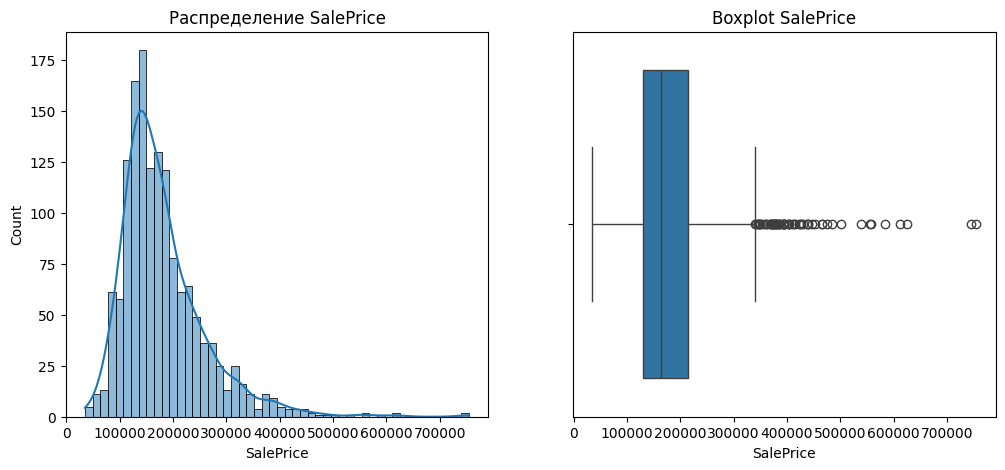

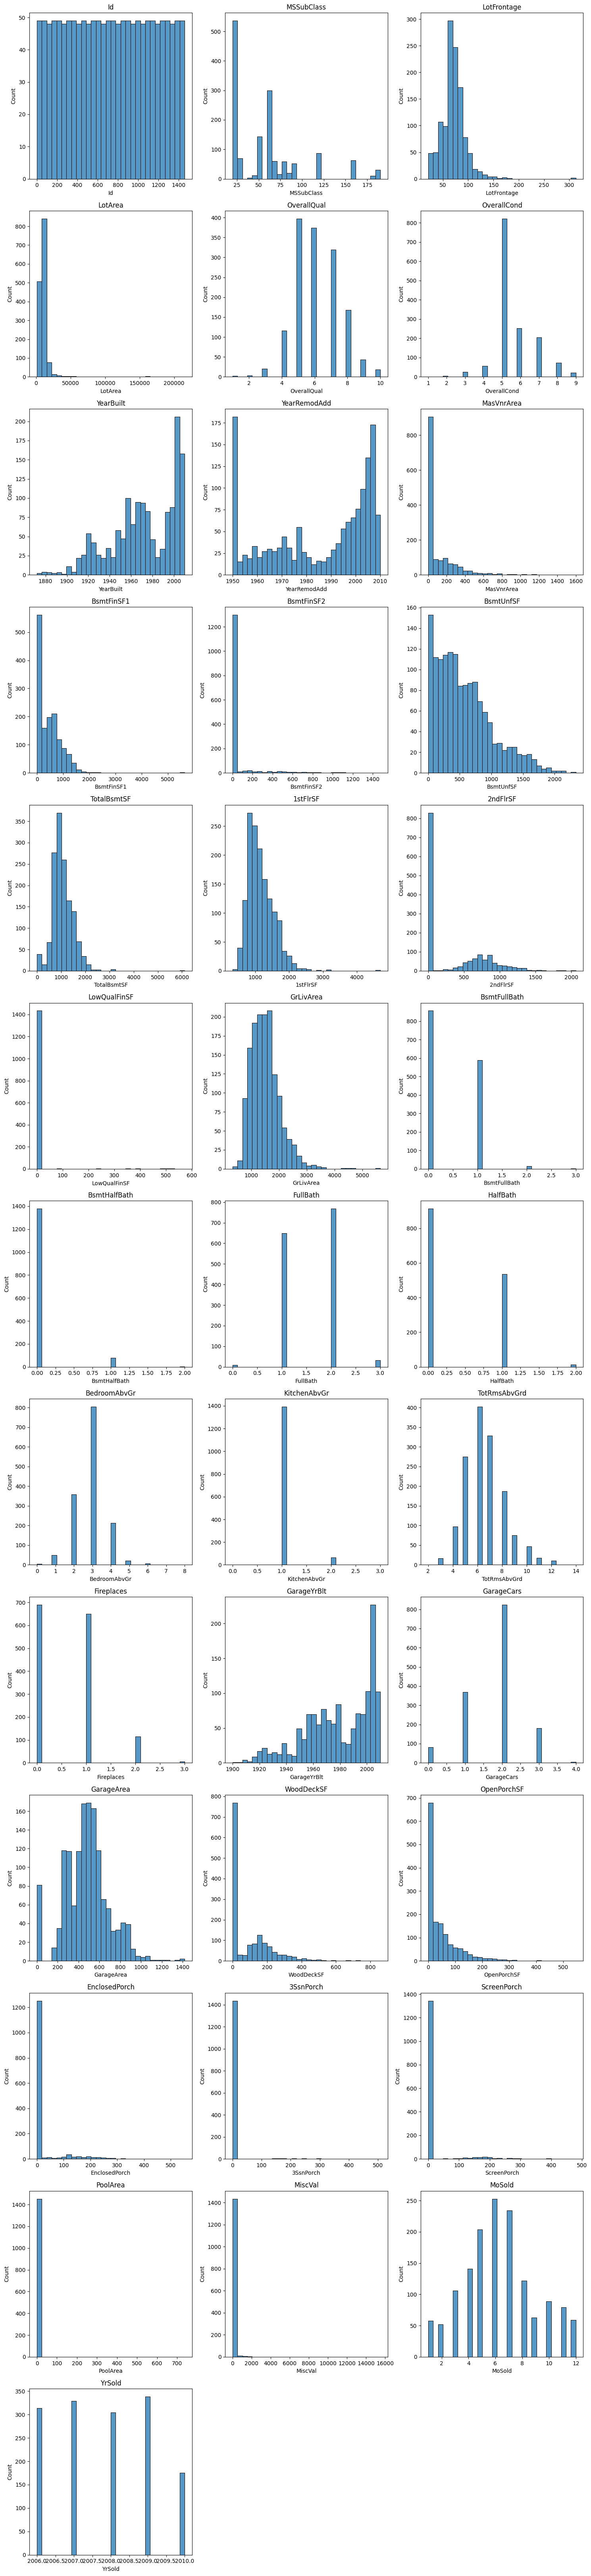

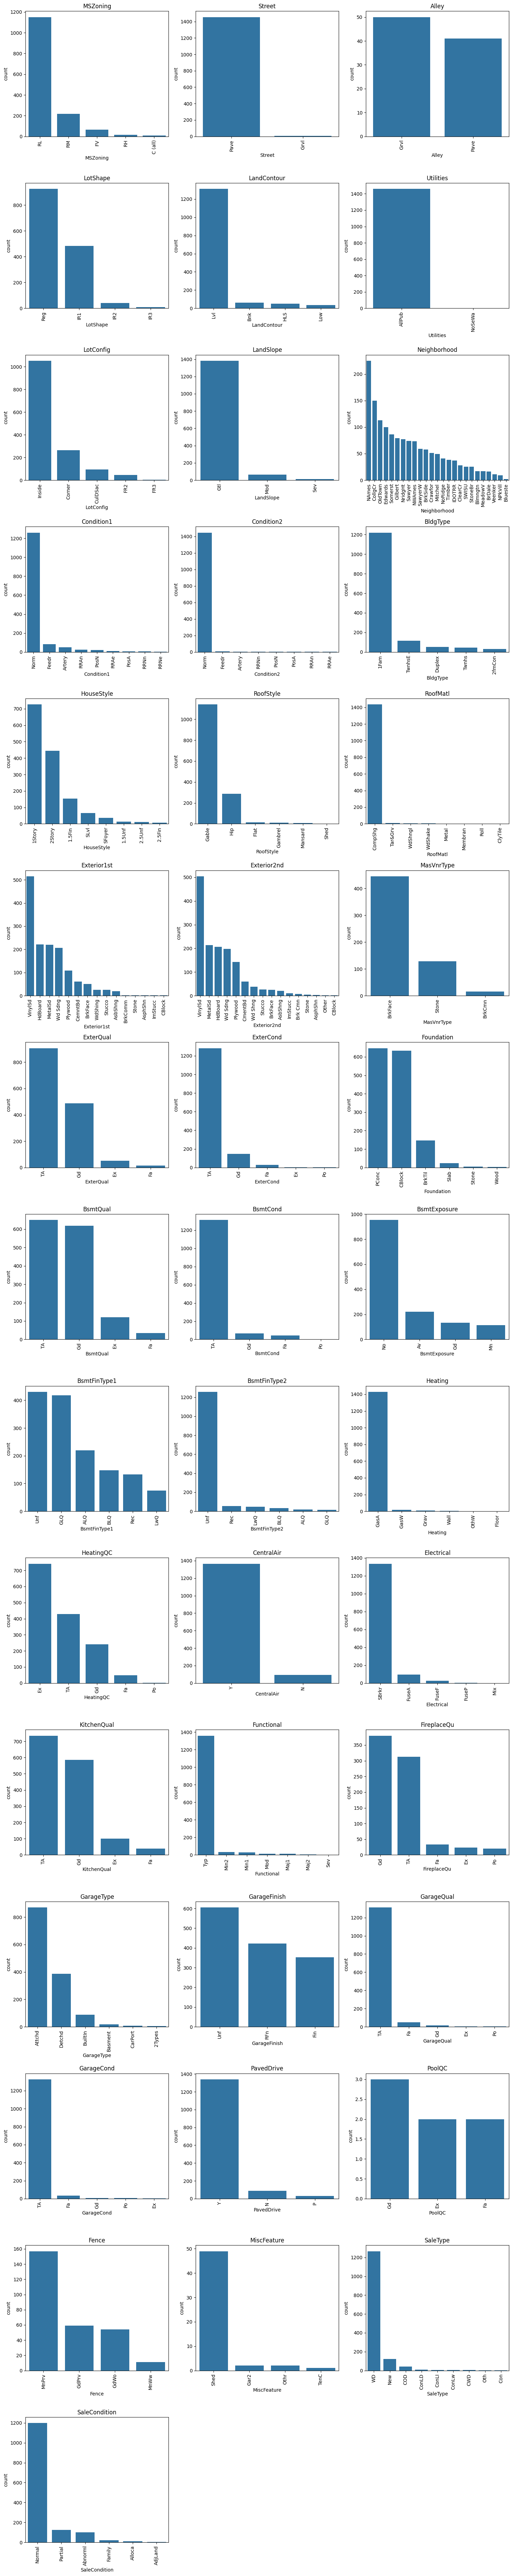

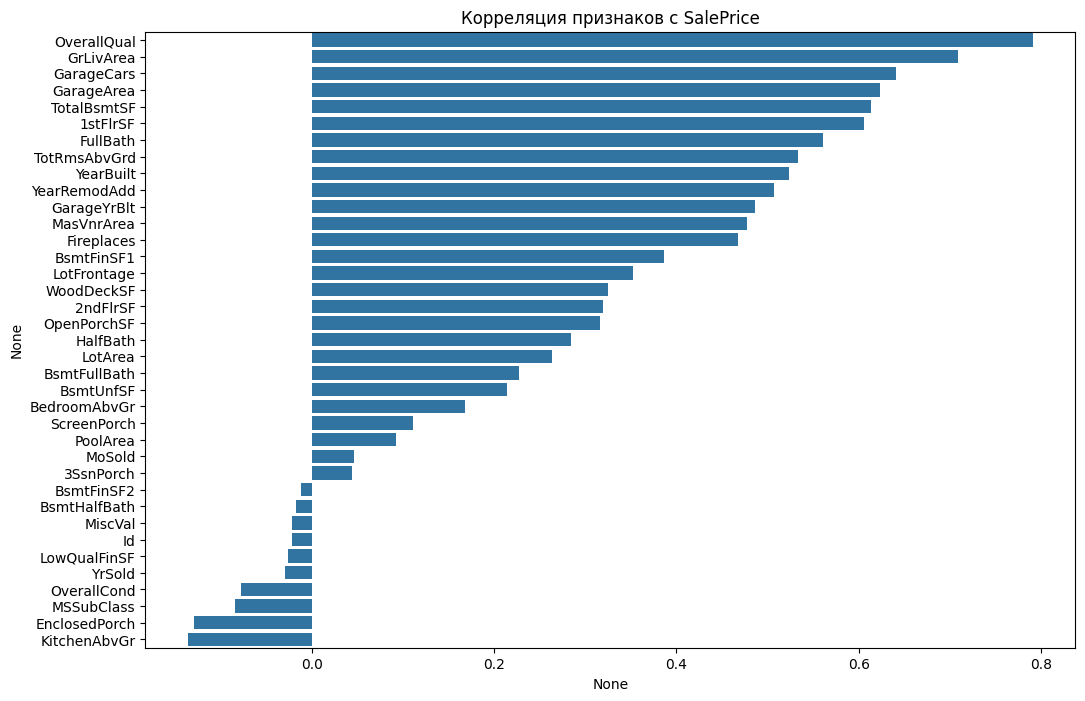

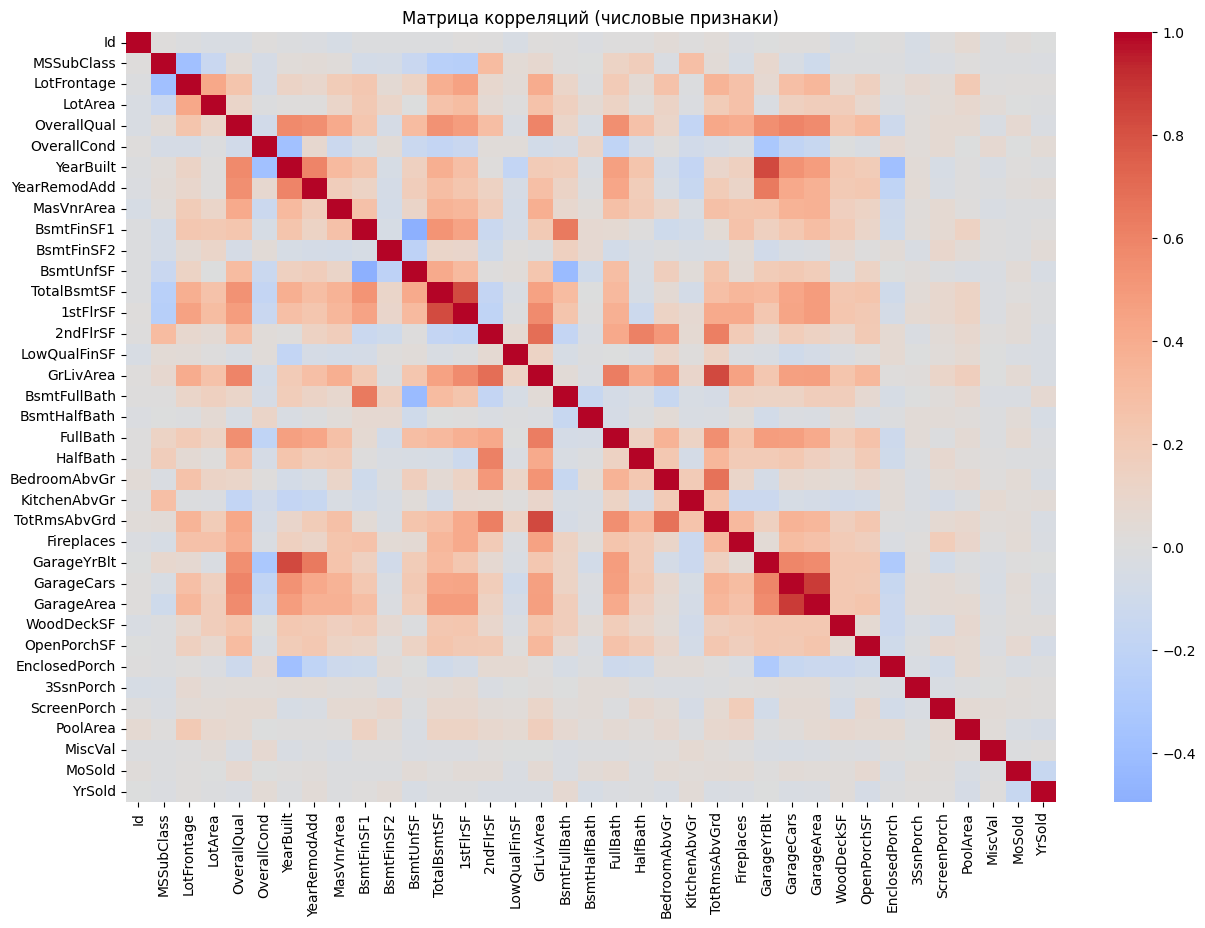

In [9]:

# 1. Распределение цен на дома
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(y, bins=50, kde=True)
plt.title("Распределение SalePrice")

plt.subplot(1,2,2)
sns.boxplot(x=y)
plt.title("Boxplot SalePrice")

plt.show()



# 2. Числовые признаки
numeric_cols = X.select_dtypes(include=np.number).columns

fig, axes = plt.subplots(len(numeric_cols)//3 + 1, 3, figsize=(15, 5 * (len(numeric_cols)//3 + 1)))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(X[col].dropna(), bins=30, ax=axes[i], kde=False)
    axes[i].set_title(col)

# убираем пустые оси
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# 3. Категориальные признаки
cat_cols = X.select_dtypes(include='object').columns

fig, axes = plt.subplots(len(cat_cols)//3 + 1, 3, figsize=(15, 5 * (len(cat_cols)//3 + 1)))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=X[col], order=X[col].value_counts().index, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=90)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# 4. Корреляционная матрица
plt.figure(figsize=(12,8))
corr = X[numeric_cols].corrwith(y).sort_values(ascending=False)
sns.barplot(x=corr, y=corr.index)
plt.title("Корреляция признаков с SalePrice")
plt.show()

plt.figure(figsize=(15,10))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm", center=0)
plt.title("Матрица корреляций (числовые признаки)")
plt.show()

In [ ]:
# данные
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
subm_temp = pd.read_csv('../data/sample_submission.csv')

In [ ]:
# target = 'SalePrice'
# id ='Id'

# y = train[target]
# X_train_raw = train.drop(columns=[target])
# X_test_raw = test.copy()

# # добавим метку набора
# X_train_raw["dataset"] = "train"
# X_test_raw["dataset"]  = "test"

# # объединяем
# full = pd.concat([X_train_raw, X_test_raw], axis=0, ignore_index=True)

# print("Размеры:")
# print("train:", X_train_raw.shape, " test:", X_test_raw.shape, " full:", full.shape)
# full.head()

Размеры:
train: (1460, 81)  test: (1459, 81)  full: (2919, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,dataset
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,train


In [ ]:
# # Общая информация
# print(full.info())

# # Количество пропусков по каждому признаку
# nan_counts = full.isna().sum()
# nan_counts = nan_counts[nan_counts > 0].sort_values(ascending=False)
# print(f"\nПризнаки с пропусками:{nan_counts}")


# # Числовые и категориальные признаки
# numeric_cols = full.select_dtypes(include=[np.number]).columns.tolist()
# categorical_cols = full.select_dtypes(include=["object", "category"]).columns.tolist()

# # Исключим служебные
# # service_cols = ["Id", "dataset"
# numeric_cols = [c for c in numeric_cols if c not in service_cols]
# categorical_cols = [c for c in categorical_cols if c not in service_cols]

# print(f"\nЧисловых признаков: {len(numeric_cols)}")
# print(f"Категориальных признаков: {len(categorical_cols)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC